1. makemore is a model that will make more **more names** like the one we train it on using the 36000 names of `names.txt`
2. The NEW names will be unique and generated

Character level 


In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
    # add <S> and <E> to the beginning and end of the word
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2) # tuple of two characters 
        b[bigram] = b.get(bigram, 0) + 1 # increment the count of the bigram by 1 

In [7]:
sorted(b.items(), key=lambda kv: -kv[1])
# sort the bigrams by their counts in descending order
# key=lambda x: x[1] means sort by the second element of the tuple
# lambda is a function that takes one argument and returns its value
#kv is a tuple of two elements, the first is the bigram, the second is its count
#kv[1] is the count of the bigram
#kv[0] is the bigram
#key is a function that takes a tuple and returns the second element of the tuple
#lambda returns the second element of the tuple

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
import torch

In [9]:
#2D array/tensor for the bigrams 
N = torch.zeros((28,28), dtype=torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [11]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [12]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 27.5, 27.5, -0.5)

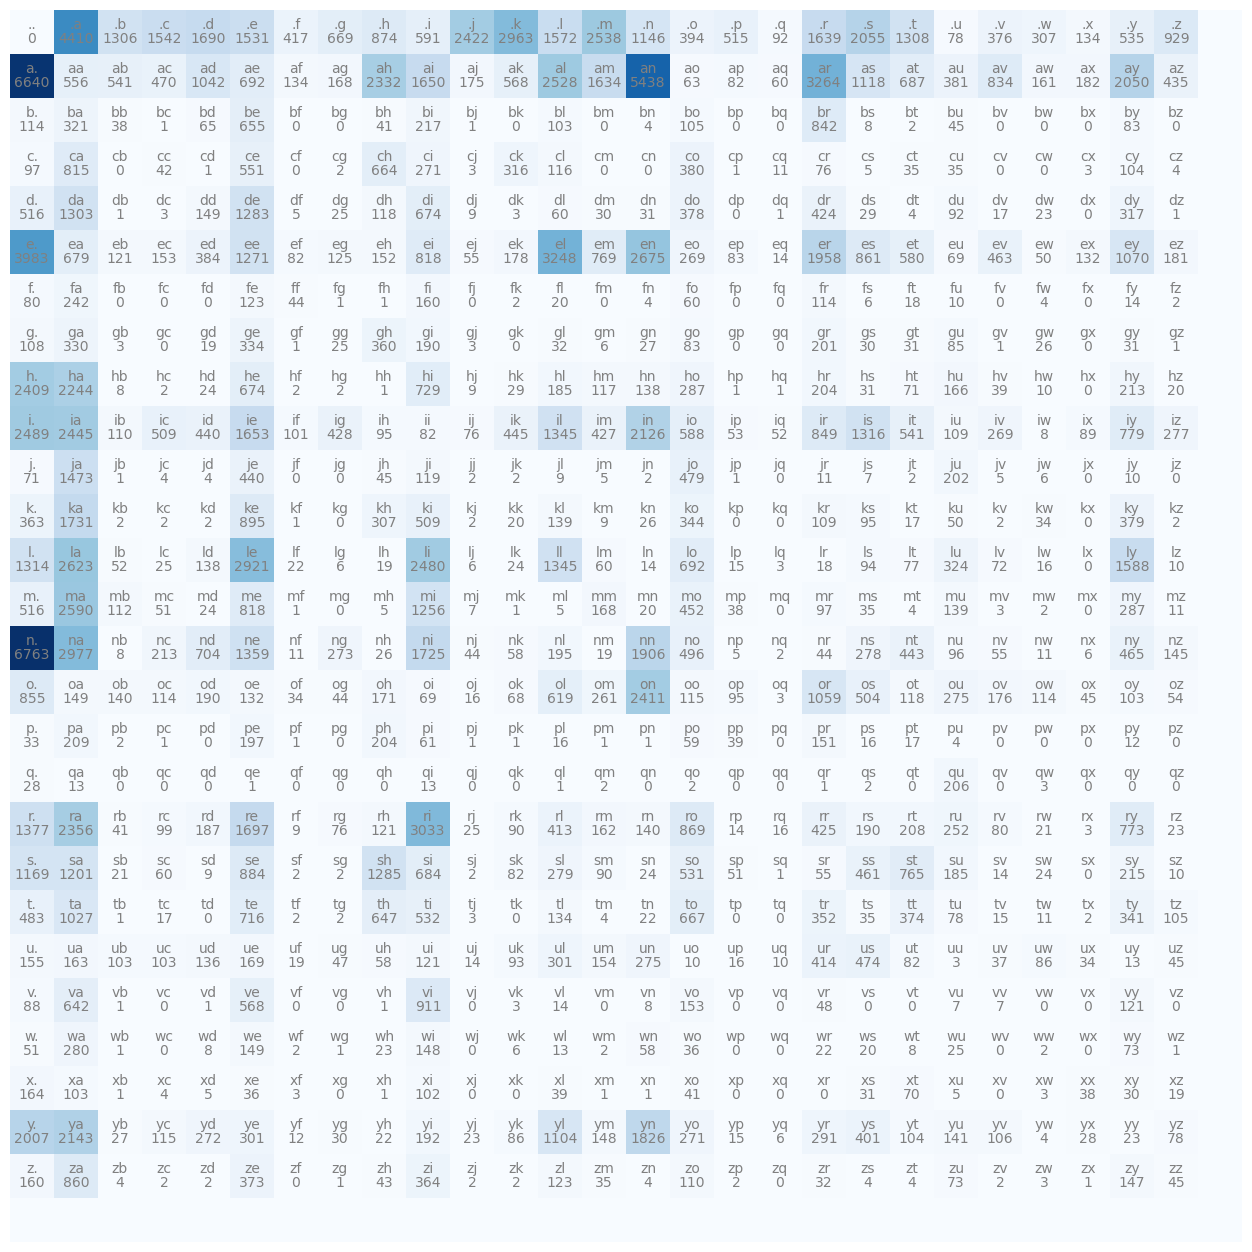

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range (27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')


In [14]:
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929,    0], dtype=torch.int32)

In [15]:
p = N[0].float()
p = p / p.sum() # normalize the probabilities
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [16]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # sample one character from the distribution p 
itos[ix] # convert the index to a character


'm'

In [17]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g) # sample one character from the distribution p

tensor([19, 14,  1,  1, 20, 20,  1, 13, 13, 13, 11, 23, 13, 19, 18, 26, 11,  7,
        19,  1, 11, 18, 10, 11, 15,  2,  9, 18,  2,  5,  3,  1, 13, 11, 11, 22,
        11, 15, 26,  2, 18, 13, 10,  1, 15,  2,  3, 15, 10, 12,  4,  9,  3,  4,
         6,  4, 19, 10,  3,  8,  4, 10, 13, 14, 13, 10, 19, 11,  8, 13,  5,  5,
         6, 25, 20, 10, 18,  1,  8,  3,  2, 20,  1,  1,  3, 10, 11, 25, 18,  1,
         9, 11,  8, 12,  3, 12, 19,  9, 18, 13])

In [18]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum() # normalize the probabilities
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # sample one character from the distribution 
        out.append(itos[ix])
        if ix == 0:
            break
    
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [19]:
############# My code #############
# to see shapes of the tensors
    #T = N.float()
    #N.float().shape, T.sum(1, keepdim=True).shape ,P.shape
# 28x28, 28x1, broardcasting to 28x28

In [20]:
P = N.float()
P /= P.sum(1, keepdim=True) # normalize the probabilities by the row (sum of the row is 1)
P[0], P[0].sum(),P

(tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
         0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
         0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
         0.0000]),
 tensor(1.),
 tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
          1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
          4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
          5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
          4.1832e-03, 1.6702e-02, 2.9001e-02, 0.0000e+00],
         [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
          3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
          7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
          9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
          

In [21]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


# Loss function

In [22]:
# Goal: maximize likelihood of data with respect to parameters (weights/ biases and the distribution of the data)
# equivalent to minimizing the negative log likelihood of the data
# equivalent to maximizing the log likelihood of the data (because log is a monotonically increasing function)
# equivalent to minimizing the average negative log likelihood of the data (because the average of a monotonically increasing function is a monotonically increasing function)

# log(a*b) = log(a) + log(b)

In [25]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] # convert the character to an index and ix1 is the index of the first character in the bigram
        ix2 = stoi[ch2] # convert the character to an index and ix2 is the index of the second character in the bigram
        prob = P[ix1, ix2] # probability of the bigram is the probability of the first character given the second character
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1} {ch2} {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

. e 0.0478 -3.0408
e m 0.0377 -3.2793
m m 0.0253 -3.6772
m a 0.3899 -0.9418
a . 0.1960 -1.6299
. o 0.0123 -4.3982
o l 0.0780 -2.5508
l i 0.1777 -1.7278
i v 0.0152 -4.1867
v i 0.3541 -1.0383
i a 0.1381 -1.9796
a . 0.1960 -1.6299
. a 0.1377 -1.9829
a v 0.0246 -3.7045
v a 0.2495 -1.3882
a . 0.1960 -1.6299
. i 0.0184 -3.9927
i s 0.0743 -2.5990
s a 0.1482 -1.9094
a b 0.0160 -4.1373
b e 0.2476 -1.3958
e l 0.1590 -1.8386
l l 0.0964 -2.3397
l a 0.1879 -1.6717
a . 0.1960 -1.6299
. s 0.0642 -2.7465
s o 0.0655 -2.7256
o p 0.0120 -4.4250
p h 0.1988 -1.6153
h i 0.0957 -2.3463
i a 0.1381 -1.9796
a . 0.1960 -1.6299
. c 0.0481 -3.0337
c h 0.1880 -1.6713
h a 0.2946 -1.2220
a r 0.0963 -2.3400
r l 0.0325 -3.4259
l o 0.0496 -3.0042
o t 0.0149 -4.2082
t t 0.0671 -2.7009
t e 0.1285 -2.0515
e . 0.1950 -1.6346
. m 0.0792 -2.5354
m i 0.1891 -1.6655
i a 0.1381 -1.9796
a . 0.1960 -1.6299
. a 0.1377 -1.9829
a m 0.0482 -3.0319
m e 0.1232 -2.0943
e l 0.1590 -1.8386
l i 0.1777 -1.7278
i a 0.1381 -1.9796
a . 0.1960 -

e . 0.1950 -1.6346
. j 0.0756 -2.5822
j a 0.5079 -0.6774
a m 0.0482 -3.0319
m y 0.0432 -3.1417
y a 0.2192 -1.5177
a . 0.1960 -1.6299
. l 0.0491 -3.0144
l u 0.0232 -3.7631
u a 0.0520 -2.9566
a . 0.1960 -1.6299
. m 0.0792 -2.5354
m a 0.3899 -0.9418
a y 0.0605 -2.8051
y t 0.0106 -4.5433
t e 0.1285 -2.0515
e . 0.1950 -1.6346
. p 0.0161 -4.1304
p e 0.1920 -1.6502
e i 0.0401 -3.2176
i g 0.0242 -3.7223
g h 0.1868 -1.6776
h t 0.0093 -4.6753
t o 0.1197 -2.1224
o n 0.3039 -1.1911
n . 0.3690 -0.9969
. r 0.0512 -2.9727
r a 0.1855 -1.6846
a e 0.0204 -3.8911
e l 0.1590 -1.8386
l e 0.2093 -1.5641
e e 0.0622 -2.7769
e . 0.1950 -1.6346
. r 0.0512 -2.9727
r o 0.0684 -2.6820
o s 0.0635 -2.7563
s a 0.1482 -1.9094
a b 0.0160 -4.1373
b e 0.2476 -1.3958
e l 0.1590 -1.8386
l l 0.0964 -2.3397
l a 0.1879 -1.6717
a . 0.1960 -1.6299
. s 0.0642 -2.7465
s h 0.1585 -1.8418
h a 0.2946 -1.2220
a y 0.0605 -2.8051
y n 0.1868 -1.6778
n a 0.1624 -1.8175
a . 0.1960 -1.6299
. s 0.0642 -2.7465
s u 0.0228 -3.7800
u s 0.1512 -

e n 0.1310 -2.0327
n i 0.0941 -2.3631
i a 0.1381 -1.9796
a . 0.1960 -1.6299
. a 0.1377 -1.9829
a d 0.0308 -3.4818
d a 0.2371 -1.4394
a l 0.0746 -2.5955
l e 0.2093 -1.5641
e n 0.1310 -2.0327
n a 0.1624 -1.8175
a . 0.1960 -1.6299
. a 0.1377 -1.9829
a d 0.0308 -3.4818
d e 0.2334 -1.4548
e l 0.1590 -1.8386
l a 0.1879 -1.6717
a i 0.0487 -3.0222
i n 0.1201 -2.1194
n e 0.0742 -2.6016
e . 0.1950 -1.6346
. a 0.1377 -1.9829
a h 0.0688 -2.6762
h l 0.0243 -3.7177
l a 0.1879 -1.6717
a m 0.0482 -3.0319
m . 0.0777 -2.5551
. a 0.1377 -1.9829
a l 0.0746 -2.5955
l a 0.1879 -1.6717
a y 0.0605 -2.8051
y i 0.0196 -3.9302
i a 0.1381 -1.9796
a h 0.0688 -2.6762
h . 0.3163 -1.1510
. a 0.1377 -1.9829
a l 0.0746 -2.5955
l l 0.0964 -2.3397
l i 0.1777 -1.7278
i . 0.1406 -1.9617
. a 0.1377 -1.9829
a m 0.0482 -3.0319
m e 0.1232 -2.0943
e n 0.1310 -2.0327
n a 0.1624 -1.8175
a . 0.1960 -1.6299
. a 0.1377 -1.9829
a m 0.0482 -3.0319
m i 0.1891 -1.6655
i l 0.0760 -2.5772
l y 0.1138 -2.1736
y a 0.2192 -1.5177
a . 0.1960 -

i s 0.0743 -2.5990
s h 0.1585 -1.8418
h a 0.2946 -1.2220
a . 0.1960 -1.6299
. d 0.0528 -2.9420
d o 0.0688 -2.6769
o m 0.0329 -3.4144
m i 0.1891 -1.6655
i n 0.1201 -2.1194
n g 0.0149 -4.2067
g a 0.1713 -1.7646
a . 0.1960 -1.6299
. d 0.0528 -2.9420
d o 0.0688 -2.6769
o r 0.1335 -2.0138
r i 0.2388 -1.4320
i a 0.1381 -1.9796
a n 0.1605 -1.8296
n . 0.3690 -0.9969
. e 0.0478 -3.0408
e i 0.0401 -3.2176
i l 0.0760 -2.5772
l i 0.1777 -1.7278
i s 0.0743 -2.5990
s . 0.1442 -1.9365
. e 0.0478 -3.0408
e k 0.0087 -4.7426
k n 0.0052 -5.2671
n o 0.0271 -3.6096
o o 0.0145 -4.2340
o r 0.1335 -2.0138
r . 0.1084 -2.2217
. e 0.0478 -3.0408
e l 0.1590 -1.8386
l a 0.1879 -1.6717
a n 0.1605 -1.8296
n n 0.1040 -2.2634
n a 0.1624 -1.8175
a . 0.1960 -1.6299
. e 0.0478 -3.0408
e l 0.1590 -1.8386
l y 0.1138 -2.1736
y s 0.0410 -3.1937
s a 0.1482 -1.9094
a . 0.1960 -1.6299
. e 0.0478 -3.0408
e m 0.0377 -3.2793
m i 0.1891 -1.6655
i l 0.0760 -2.5772
l e 0.2093 -1.5641
e y 0.0524 -2.9490
y . 0.2053 -1.5833
. e 0.0478 -

l i 0.1777 -1.7278
i s 0.0743 -2.5990
s s 0.0569 -2.8670
s e 0.1091 -2.2159
e . 0.1950 -1.6346
. a 0.1377 -1.9829
a n 0.1605 -1.8296
n a 0.1624 -1.8175
a s 0.0330 -3.4114
s t 0.0944 -2.3605
t y 0.0612 -2.7933
y n 0.1868 -1.6778
n . 0.3690 -0.9969
. a 0.1377 -1.9829
a n 0.1605 -1.8296
n d 0.0384 -3.2594
d r 0.0771 -2.5620
r i 0.2388 -1.4320
i a 0.1381 -1.9796
a n 0.1605 -1.8296
n a 0.1624 -1.8175
a . 0.1960 -1.6299
. a 0.1377 -1.9829
a n 0.1605 -1.8296
n g 0.0149 -4.2067
g e 0.1733 -1.7526
e l 0.1590 -1.8386
l i 0.1777 -1.7278
i c 0.0288 -3.5489
c . 0.0275 -3.5949
. a 0.1377 -1.9829
a n 0.1605 -1.8296
n g 0.0149 -4.2067
g e 0.1733 -1.7526
e l 0.1590 -1.8386
l i 0.1777 -1.7278
i s 0.0743 -2.5990
s a 0.1482 -1.9094
a . 0.1960 -1.6299
. a 0.1377 -1.9829
a n 0.1605 -1.8296
n i 0.0941 -2.3631
i l 0.0760 -2.5772
l a 0.1879 -1.6717
a h 0.0688 -2.6762
h . 0.3163 -1.1510
. a 0.1377 -1.9829
a n 0.1605 -1.8296
n i 0.0941 -2.3631
i r 0.0480 -3.0373
r a 0.1855 -1.6846
a . 0.1960 -1.6299
. a 0.1377 -

j e 0.1517 -1.8857
e s 0.0422 -3.1663
s l 0.0344 -3.3691
l y 0.1138 -2.1736
y . 0.2053 -1.5833
. j 0.0756 -2.5822
j e 0.1517 -1.8857
e s 0.0422 -3.1663
s s 0.0569 -2.8670
s i 0.0844 -2.4724
i k 0.0251 -3.6833
k a 0.3435 -1.0687
a . 0.1960 -1.6299
. j 0.0756 -2.5822
j h 0.0155 -4.1658
h a 0.2946 -1.2220
a d 0.0308 -3.4818
d e 0.2334 -1.4548
e . 0.1950 -1.6346
. j 0.0756 -2.5822
j h 0.0155 -4.1658
h a 0.2946 -1.2220
a n 0.1605 -1.8296
n a 0.1624 -1.8175
a e 0.0204 -3.8911
e . 0.1950 -1.6346
. j 0.0756 -2.5822
j i 0.0410 -3.1933
i a 0.1381 -1.9796
a h 0.0688 -2.6762
h . 0.3163 -1.1510
. j 0.0756 -2.5822
j i 0.0410 -3.1933
i y 0.0440 -3.1234
y a 0.2192 -1.5177
a n 0.1605 -1.8296
n a 0.1624 -1.8175
a . 0.1960 -1.6299
. j 0.0756 -2.5822
j o 0.1652 -1.8008
o d 0.0239 -3.7319
d e 0.2334 -1.4548
e e 0.0622 -2.7769
e . 0.1950 -1.6346
. j 0.0756 -2.5822
j o 0.1652 -1.8008
o l 0.0780 -2.5508
l e 0.2093 -1.5641
e a 0.0332 -3.4038
a h 0.0688 -2.6762
h . 0.3163 -1.1510
. j 0.0756 -2.5822
j o 0.1652 -

i s 0.0743 -2.5990
s l 0.0344 -3.3691
l e 0.2093 -1.5641
e y 0.0524 -2.9490
y . 0.2053 -1.5833
. t 0.0408 -3.1983
t a 0.1844 -1.6908
a k 0.0168 -4.0886
k s 0.0188 -3.9713
s h 0.1585 -1.8418
h v 0.0051 -5.2744
v i 0.3541 -1.0383
i . 0.1406 -1.9617
. t 0.0408 -3.1983
t a 0.1844 -1.6908
a l 0.0746 -2.5955
l a 0.1879 -1.6717
a y 0.0605 -2.8051
y s 0.0410 -3.1937
s i 0.0844 -2.4724
i a 0.1381 -1.9796
a . 0.1960 -1.6299
. t 0.0408 -3.1983
t a 0.1844 -1.6908
a l 0.0746 -2.5955
l e 0.2093 -1.5641
e i 0.0401 -3.2176
i a 0.1381 -1.9796
a . 0.1960 -1.6299
. t 0.0408 -3.1983
t a 0.1844 -1.6908
a l 0.0746 -2.5955
l e 0.2093 -1.5641
e i 0.0401 -3.2176
i g 0.0242 -3.7223
g h 0.1868 -1.6776
h a 0.2946 -1.2220
a . 0.1960 -1.6299
. t 0.0408 -3.1983
t a 0.1844 -1.6908
a l 0.0746 -2.5955
l i 0.1777 -1.7278
i n 0.1201 -2.1194
n . 0.3690 -0.9969
. t 0.0408 -3.1983
t a 0.1844 -1.6908
a l 0.0746 -2.5955
l l 0.0964 -2.3397
l i 0.1777 -1.7278
i e 0.0934 -2.3710
e . 0.1950 -1.6346
. t 0.0408 -3.1983
t a 0.1844 -

r g 0.0060 -5.1186
g i 0.0986 -2.3167
i e 0.0934 -2.3710
e . 0.1950 -1.6346
. j 0.0756 -2.5822
j o 0.1652 -1.8008
o s 0.0635 -2.7563
s e 0.1091 -2.2159
e p 0.0041 -5.5056
p h 0.1988 -1.6153
h y 0.0280 -3.5767
y n 0.1868 -1.6778
n e 0.0742 -2.6016
e . 0.1950 -1.6346
. j 0.0756 -2.5822
j o 0.1652 -1.8008
o v 0.0222 -3.8084
v a 0.2495 -1.3882
a n 0.1605 -1.8296
n n 0.1040 -2.2634
n i 0.0941 -2.3631
i . 0.1406 -1.9617
. j 0.0756 -2.5822
j o 0.1652 -1.8008
o z 0.0068 -4.9899
z i 0.1518 -1.8852
i . 0.1406 -1.9617
. j 0.0756 -2.5822
j u 0.0697 -2.6642
u e 0.0539 -2.9205
e l 0.1590 -1.8386
l l 0.0964 -2.3397
l e 0.2093 -1.5641
e . 0.1950 -1.6346
. j 0.0756 -2.5822
j u 0.0697 -2.6642
u h 0.0185 -3.9899
h i 0.0957 -2.3463
i . 0.1406 -1.9617
. j 0.0756 -2.5822
j u 0.0697 -2.6642
u l 0.0960 -2.3433
l e 0.2093 -1.5641
e z 0.0089 -4.7259
z . 0.0667 -2.7072
. j 0.0756 -2.5822
j u 0.0697 -2.6642
u l 0.0960 -2.3433
l i 0.1777 -1.7278
i a 0.1381 -1.9796
a h 0.0688 -2.6762
h n 0.0181 -4.0108
n a 0.1624 -

z i 0.1518 -1.8852
i y 0.0440 -3.1234
y a 0.2192 -1.5177
a h 0.0688 -2.6762
h . 0.3163 -1.1510
. k 0.0925 -2.3806
k e 0.1776 -1.7283
e a 0.0332 -3.4038
a v 0.0246 -3.7045
v y 0.0470 -3.0570
y . 0.2053 -1.5833
. k 0.0925 -2.3806
k e 0.1776 -1.7283
e e 0.0622 -2.7769
e g 0.0061 -5.0961
g h 0.1868 -1.6776
h a 0.2946 -1.2220
a n 0.1605 -1.8296
n . 0.3690 -0.9969
. k 0.0925 -2.3806
k e 0.1776 -1.7283
e e 0.0622 -2.7769
e l 0.1590 -1.8386
l e 0.2093 -1.5641
e i 0.0401 -3.2176
i g 0.0242 -3.7223
g h 0.1868 -1.6776
h . 0.3163 -1.1510
. k 0.0925 -2.3806
k e 0.1776 -1.7283
e h 0.0074 -4.9005
h a 0.2946 -1.2220
a u 0.0112 -4.4879
u l 0.0960 -2.3433
l a 0.1879 -1.6717
a n 0.1605 -1.8296
n i 0.0941 -2.3631
i . 0.1406 -1.9617
. k 0.0925 -2.3806
k e 0.1776 -1.7283
e i 0.0401 -3.2176
i . 0.1406 -1.9617
. k 0.0925 -2.3806
k e 0.1776 -1.7283
e i 0.0401 -3.2176
i l 0.0760 -2.5772
l i 0.1777 -1.7278
i . 0.1406 -1.9617
. k 0.0925 -2.3806
k e 0.1776 -1.7283
e i 0.0401 -3.2176
i l 0.0760 -2.5772
l i 0.1777 -

i s 0.0743 -2.5990
s . 0.1442 -1.9365
. i 0.0184 -3.9927
i k 0.0251 -3.6833
k n 0.0052 -5.2671
n o 0.0271 -3.6096
o o 0.0145 -4.2340
o r 0.1335 -2.0138
r . 0.1084 -2.2217
. i 0.0184 -3.9927
i l 0.0760 -2.5772
l a 0.1879 -1.6717
a i 0.0487 -3.0222
i s 0.0743 -2.5990
s a 0.1482 -1.9094
a a 0.0164 -4.1100
a n 0.1605 -1.8296
n e 0.0742 -2.6016
e . 0.1950 -1.6346
. i 0.0184 -3.9927
i l 0.0760 -2.5772
l a 0.1879 -1.6717
a y 0.0605 -2.8051
y d 0.0278 -3.5819
d a 0.2371 -1.4394
a . 0.1960 -1.6299
. i 0.0184 -3.9927
i l 0.0760 -2.5772
l e 0.2093 -1.5641
e e 0.0622 -2.7769
e . 0.1950 -1.6346
. i 0.0184 -3.9927
i l 0.0760 -2.5772
l e 0.2093 -1.5641
e e 0.0622 -2.7769
e n 0.1310 -2.0327
n e 0.0742 -2.6016
e . 0.1950 -1.6346
. i 0.0184 -3.9927
i l 0.0760 -2.5772
l i 0.1777 -1.7278
i a 0.1381 -1.9796
a n 0.1605 -1.8296
n . 0.3690 -0.9969
. i 0.0184 -3.9927
i l 0.0760 -2.5772
l i 0.1777 -1.7278
i a 0.1381 -1.9796
a n 0.1605 -1.8296
n n 0.1040 -2.2634
n y 0.0254 -3.6741
y . 0.2053 -1.5833
. i 0.0184 -

z a 0.3586 -1.0255
a m 0.0482 -3.0319
m y 0.0432 -3.1417
y i 0.0196 -3.9302
i a 0.1381 -1.9796
a h 0.0688 -2.6762
h . 0.3163 -1.1510
. z 0.0290 -3.5404
z a 0.3586 -1.0255
a n 0.1605 -1.8296
n a 0.1624 -1.8175
a y 0.0605 -2.8051
y a 0.2192 -1.5177
a h 0.0688 -2.6762
h . 0.3163 -1.1510
. z 0.0290 -3.5404
z a 0.3586 -1.0255
a n 0.1605 -1.8296
n d 0.0384 -3.2594
d e 0.2334 -1.4548
e r 0.0959 -2.3447
r . 0.1084 -2.2217
. z 0.0290 -3.5404
z a 0.3586 -1.0255
a r 0.0963 -2.3400
r a 0.1855 -1.6846
a y 0.0605 -2.8051
y i 0.0196 -3.9302
i a 0.1381 -1.9796
a h 0.0688 -2.6762
h . 0.3163 -1.1510
. z 0.0290 -3.5404
z a 0.3586 -1.0255
a r 0.0963 -2.3400
r i 0.2388 -1.4320
i e 0.0934 -2.3710
e l 0.1590 -1.8386
l . 0.0941 -2.3630
. z 0.0290 -3.5404
z a 0.3586 -1.0255
a r 0.0963 -2.3400
r i 0.2388 -1.4320
i o 0.0332 -3.4046
o n 0.3039 -1.1911
n n 0.1040 -2.2634
n a 0.1624 -1.8175
a . 0.1960 -1.6299
. z 0.0290 -3.5404
z a 0.3586 -1.0255
a r 0.0963 -2.3400
r n 0.0110 -4.5077
n i 0.0941 -2.3631
i s 0.0743 -

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



a y 0.0605 -2.8051
y y 0.0024 -6.0522
y a 0.2192 -1.5177
a n 0.1605 -1.8296
n . 0.3690 -0.9969
. h 0.0273 -3.6014
h e 0.0885 -2.4248
e l 0.1590 -1.8386
l d 0.0099 -4.6166
d e 0.2334 -1.4548
e r 0.0959 -2.3447
r . 0.1084 -2.2217
. h 0.0273 -3.6014
h e 0.0885 -2.4248
e n 0.1310 -2.0327
n d 0.0384 -3.2594
d r 0.0771 -2.5620
r y 0.0609 -2.7991
y . 0.2053 -1.5833
. h 0.0273 -3.6014
h e 0.0885 -2.4248
e n 0.1310 -2.0327
n g 0.0149 -4.2067
g . 0.0560 -2.8816
. h 0.0273 -3.6014
h e 0.0885 -2.4248
e n 0.1310 -2.0327
n o 0.0271 -3.6096
o c 0.0144 -4.2427
c h 0.1880 -1.6713
h . 0.3163 -1.1510
. h 0.0273 -3.6014
h e 0.0885 -2.4248
e n 0.1310 -2.0327
n o 0.0271 -3.6096
o s 0.0635 -2.7563
s . 0.1442 -1.9365
. h 0.0273 -3.6014
h e 0.0885 -2.4248
e r 0.0959 -2.3447
r n 0.0110 -4.5077
n a 0.1624 -1.8175
a n 0.1605 -1.8296
n d 0.0384 -3.2594
d o 0.0688 -2.6769
o . 0.1078 -2.2278
. h 0.0273 -3.6014
h i 0.0957 -2.3463
i a 0.1381 -1.9796
a t 0.0203 -3.8984
t t 0.0671 -2.7009
t . 0.0867 -2.4451
. h 0.0273 -

In [26]:
# for a single word 'tanvir'

w = 'tanvir'
for w in ["tanvir"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1} {ch2} {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

. t 0.0408 -3.1983
t a 0.1844 -1.6908
a n 0.1605 -1.8296
n v 0.0030 -5.8088
v i 0.3541 -1.0383
i r 0.0480 -3.0373
r . 0.1084 -2.2217
log_likelihood=tensor(-559910.6250)
nll=tensor(559910.6250)
nll/n=tensor(2.4541)


### Our model gives zero count for a bigram then probability of that bigram is 0 => log probability will be -infinity

In [27]:
# if a bigramm is not in the training data, the probability is 0 and the log probability is -inf e.g. 'an' 'z'

for w in ["tanvirjq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1} {ch2} {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

. t 0.0408 -3.1983
t a 0.1844 -1.6908
a n 0.1605 -1.8296
n v 0.0030 -5.8088
v i 0.3541 -1.0383
i r 0.0480 -3.0373
r j 0.0020 -6.2305
j q 0.0000 -inf
q . 0.1029 -2.2736
log_likelihood=tensor(-inf)
nll=tensor(inf)
nll/n=tensor(inf)


#### solution: smoothing 

In [28]:
# if a bigramm is not in the training data, the probability is 0 and the log probability is -inf e.g. 'jq'
# solution: add-one smoothing
# add count of 1 to each bigram in the training data

P = (N + 1).float()
P /= P.sum(1, keepdim=True)

### this will ensure that the probability of each bigram is greater than 0 and the sum of the probabilities of each bigram is 1 ###

for w in ["tanvirjq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1} {ch2} {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

. t 0.0408 -3.1984
t a 0.1836 -1.6948
a n 0.1604 -1.8302
n v 0.0031 -5.7923
v i 0.3506 -1.0480
i r 0.0479 -3.0377
r j 0.0020 -6.1935
j q 0.0003 -7.9821
q . 0.0967 -2.3365
log_likelihood=tensor(-inf)
nll=tensor(inf)
nll/n=tensor(inf)
